In [1]:
#importing the necessary libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

### Preliminary exploration

In [3]:
ev_df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [4]:
print(ev_df['State'].unique())

['WA' 'NV' 'DC' 'CA' 'NC' 'KY' 'PA' 'VA' 'MD' 'IL' 'TX' 'MO' 'GA' 'NE'
 'AL' 'NY' 'AZ' 'NJ' 'MA' 'IN' 'HI' 'UT' 'DE' 'CT' 'LA' 'NH' 'OH' 'FL'
 'MI' 'WY' 'SC' 'CO' 'MN' 'ID' 'RI' 'OR' 'OK' 'KS' 'AK' 'AE' 'IA' 'BC'
 'AR' 'TN' 'NM' 'AP']


#### NOTE : Data is based on the EV population of State of Washington, United States

In [5]:
ev_df.shape

(177866, 17)

#### ***Inference:*** *There are 177866 records and  17 attributes in dataset*

In [6]:
print(ev_df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [7]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
#Checking for nulls

ev_df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

***Inference:*** *The column "Legislative District" has larger number of nulls*

In [9]:
 # caluclating the percentage of nulls

(ev_df["Legislative District"].isnull().sum()/len(ev_df["Legislative District"]))*100

0.2187039681558027

***NOTE:*** *Since the percentage of nulls in the column "Legislative District" is not significant we can drop the nulls*

In [10]:
#dropping the nulls from all columns

ev_df=ev_df.dropna()

In [11]:
ev_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

### For this analysis, we can explore the following areas:

- **EV Adoption Over Time:** Analyze the growth of the EV population by model year.
- **Geographical Distribution:** Understand where EVs are most commonly registered (e.g., by county or city).
- **EV Types:** Breakdown of the dataset by electric vehicle type (BEV, etc.).
- **Make and Model Popularity:** Identify the most popular makes and models among the registered EVs.
- **Electric Range Analysis:** Analyze the electric range of vehicles to see how EV technology is progressing.

### EV Adoption Over Time
#### The growth of the EV population by year

In [12]:
ev_df["Model Year"].value_counts() # Count of EV registrations each year from 2003 to 2023

2023    57519
2022    27708
2021    19063
2018    14286
2020    11740
2019    10913
2017     8534
2024     7072
2016     5469
2015     4826
2013     4399
2014     3496
2012     1614
2011      775
2010       23
2008       19
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: Model Year, dtype: int64

In [13]:
ev_adoption_by_year = ev_df["Model Year"].value_counts().sort_index()
ev_adoption_by_year

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

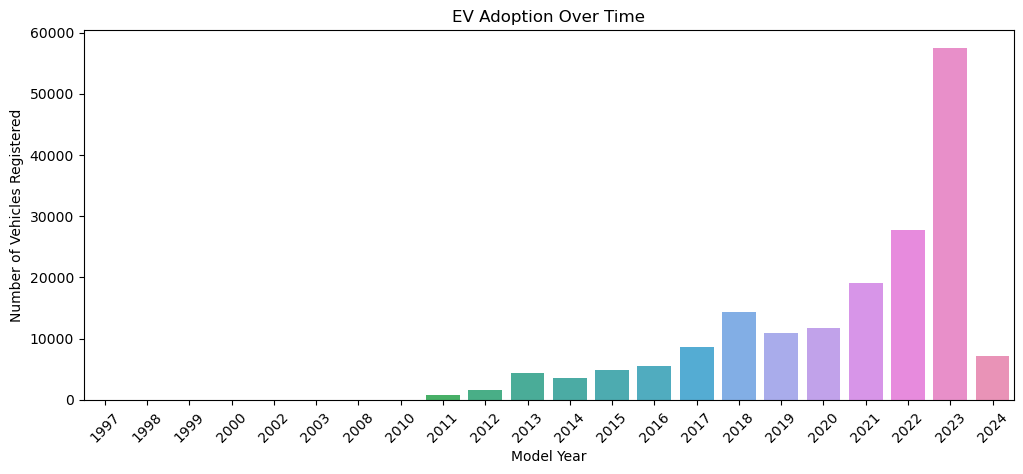

In [14]:
plt.figure().set_figwidth(12)
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values)
plt.xticks(rotation=45)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.show()

**Inference** : The bar chart demonstrates a clear upward trend in EV adoption over time, with a notable increase beginning around 2016. Up until then, the number of registered vehicles grows modestly, but from 2017 onwards, the growth rate accelerates significantly. The year 2023 stands out with a particularly sharp rise, showing the highest number of registered EVs on the graph, marking a peak in EV adoption.

### Geographical Distribution  
#### Top 3 counties

In [15]:
top_counties = ev_df["County"].value_counts()[0:3].index # Top 3 Counties with most number of EV registrations
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object')

In [16]:
top_counties_data = ev_df[ev_df["County"].isin(top_counties)] # Segregating the data for the top 3 counties
top_counties_data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10


In [17]:
ev_city_distribution_top_counties=top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")
ev_city_distribution_top_counties # Taking only the number of records in each counties

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
...,...,...,...
108,Snohomish,Alderwood Manor,1
109,Snohomish,Startup,1
110,King,Gold Bar,1
111,Pierce,Kapowsin,1


In [18]:
top_cities = ev_city_distribution_top_counties.head(10)
top_cities

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


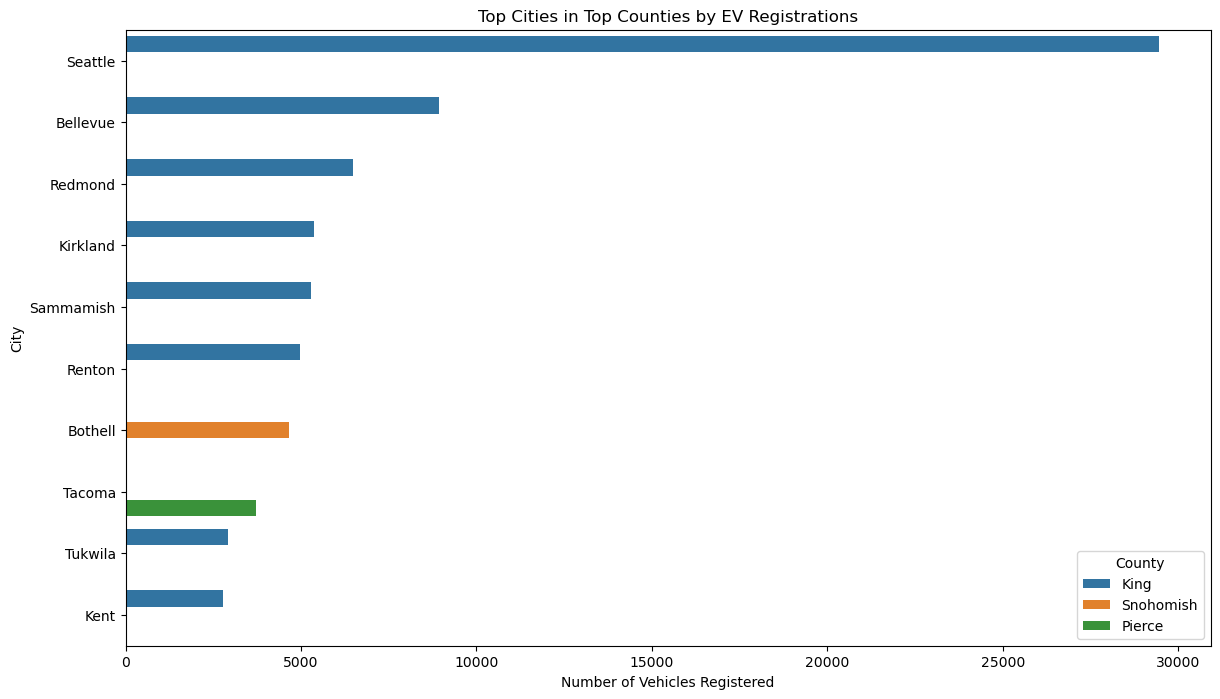

In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County',loc="lower right")
plt.show()

- Seattle, located in King County, leads with the highest number of EV registrations, significantly outpacing other cities.
- Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these numbers are considerably lower than Seattle’s.
- In Snohomish County, Bothell, shows moderate EV registrations.
- Tacoma representing Pierce County, have the few registrations

### EV Types
#### Analyzing the distribution of electric vehicle types

In [20]:
ev_type_distribution = ev_df['Electric Vehicle Type'].value_counts()
ev_type_distribution

Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: Electric Vehicle Type, dtype: int64

- **BEVs** are **fully electric** and run exclusively on battery power, while **PHEVs** combine an electric motor with an internal combustion engine and **can run on both electricity and gasoline**.

- Understanding the breakdown between them, can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions

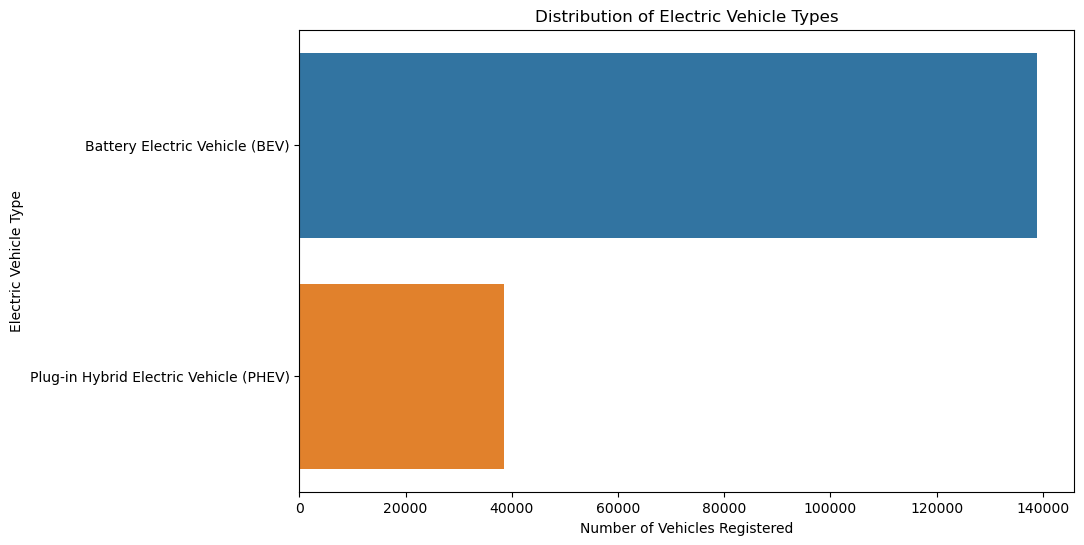

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.show()

**Inference** : The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered

### Make and Model Popularity
#### Popularity of EV manufacturers

In [22]:
ev_make_distribution = ev_df['Make'].value_counts().head(10)
ev_make_distribution

TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: Make, dtype: int64

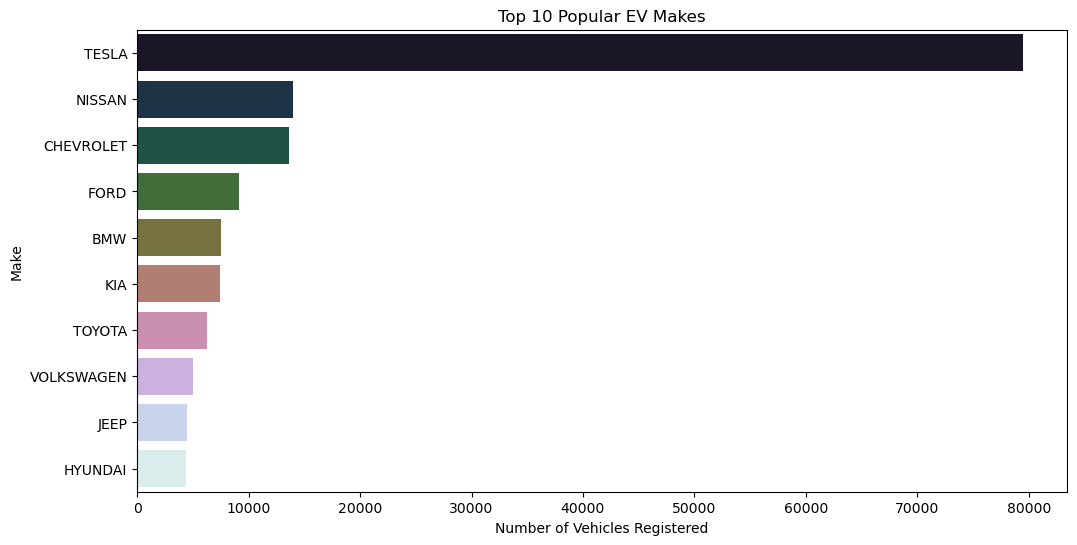

In [23]:
# analyzing the popularity of EV manufacturers
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index,palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.show()

- **TESLA** leads by a substantial margin with the highest number of registered vehicles.
- **NISSAN** is the second most popular manufacturer, followed by **CHEVROLET**, though both have significantly fewer - registrations compared to **TESLA**.
- **FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI** follow in decreasing order of the number of registered vehicles.

#### Most popular models within these top manufacturers

In [24]:
top_3_makes = ev_make_distribution.head(3).index
top_3_makes

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object')

**The big three manufacturers are Tesla, Nissan and Chevrolet**

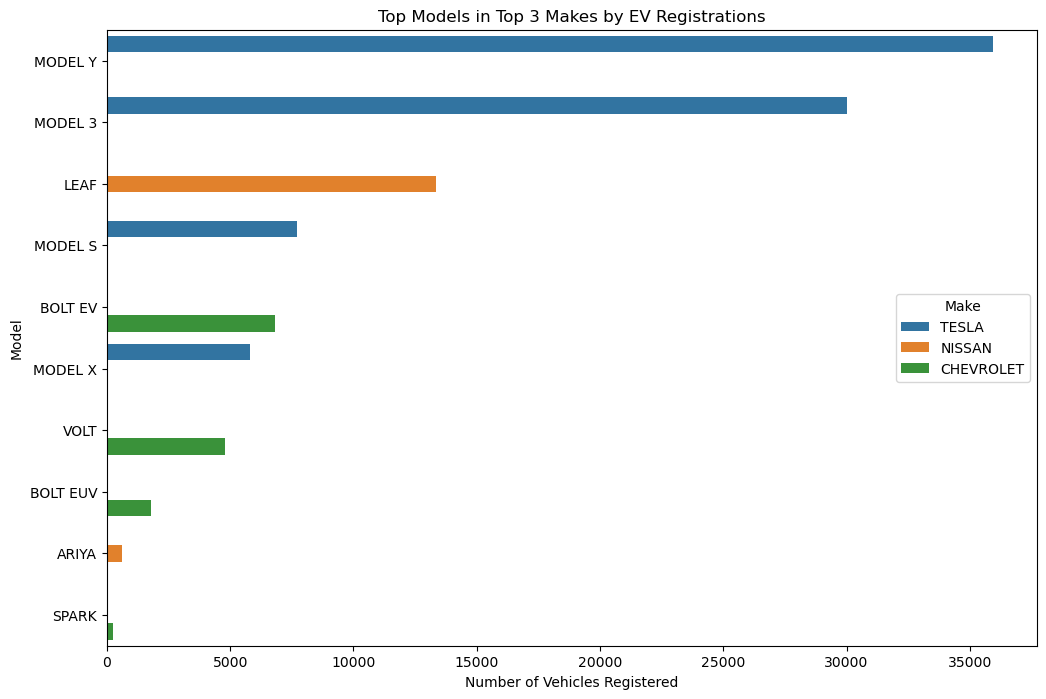

In [25]:
# filtering the dataset for these top manufacturers
top_makes_data = ev_df[ev_df['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

- TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
- TESLA’s MODEL S and MODEL X also have a significant number of registrations.
- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

### Electric Range Analysis
#### Analyzing the distribution of electric range

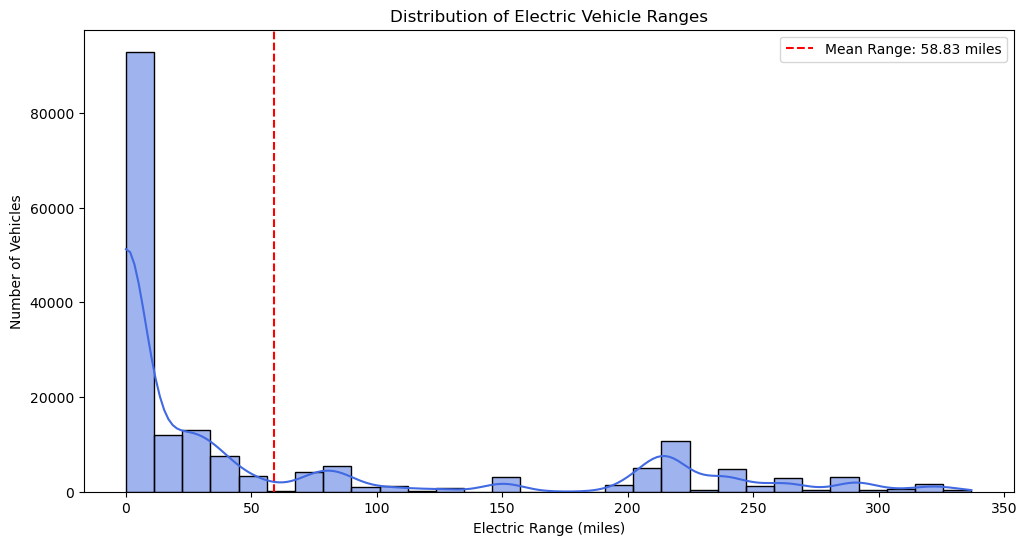

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

##### Observations:

- There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
- The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less.
- The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
- Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

#### Calculating the average electric range by model year

In [27]:
ev_df.groupby('Model Year')['Electric Range'].mean().reset_index()

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


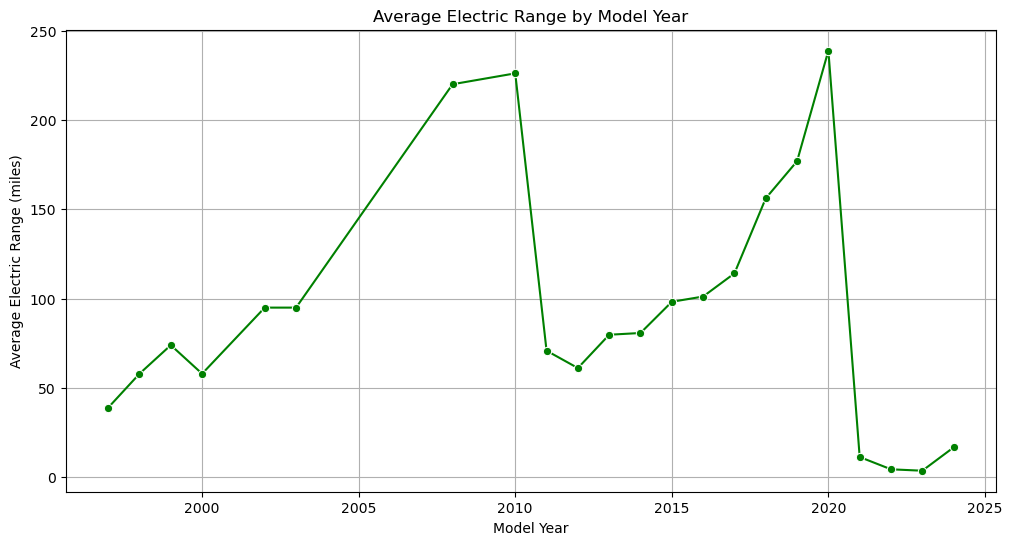

In [28]:
average_range_by_year = ev_df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

- There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
- There is a noticeable peak around the year 2020 when the average range reaches its highest point.
- Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
- After the sharp decline, there is a slight recovery in the average range in the year 2023 as shown on the graph.

#### Electric ranges among the top manufacturers and models

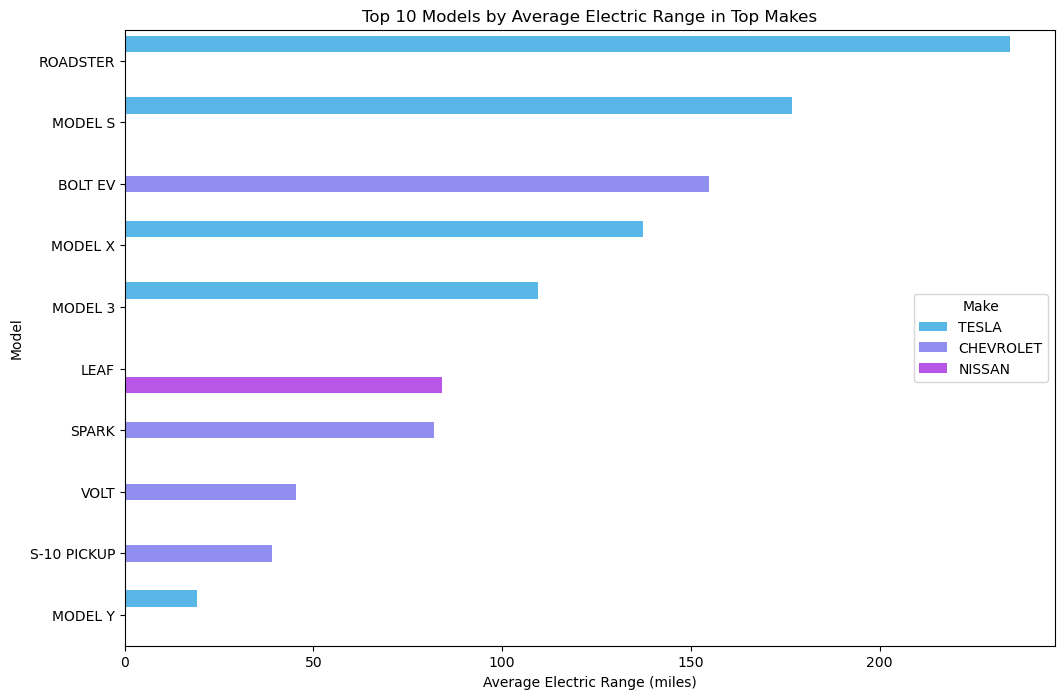

In [29]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

- The TESLA ROADSTER has the highest average electric range among the models listed.
- TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges.
- The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker.
- NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

### Inference
- **EV Adoption Over Time :** There is a clear upward trend beginning around 2016. Up until then, the number of registered vehicles grows modestly, but from 2017 onwards, the growth rate accelerates significantly. The year 2023 stands out with a particularly sharp rise, showing the highest number of registered EVs on the graph, marking a peak in EV adoption.
 
 <br>
 
- **Geographical Distribution :** Seattle, located in King County, leads with the highest number of EV registrations, followed by Bellevue and Redmond, also in King County. Thus the King County leads in the number of EV registration
     - **Read why** : __[King County highlights growing zero-emission fleet](https://medium.com/kingcounty/king-county-highlights-growing-zero-emission-fleet-announces-6-million-electric-vehicle-charging-a8f39e0f7e9a#:~:text=King%20County%20is%20a%20leader,120%20new%20zero%2Demission%20buses.")__
     
<br>

- **EV Types :** BEVs are more popular or preferred over PHEVs

<br>

- **Make and Model Popularity:** TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
    - **Read why** : __[Model Y price is cheapest ever with new WA state rebate](https://www.notebookcheck.net/Model-Y-price-is-cheapest-ever-at-23-550-with-new-WA-state-rebate-as-Tesla-adds-Quicksilver-color-option.831728.0.html#:~:text=Pro%20360%20Review-,Model%20Y%20price%20is%20cheapest%20ever%20at%20%2423%2C550%20with%20new,Tesla%20adds%20Quicksilver%20color%20option)__

<br>

- **Electric Range Analysis:** TESLA ROADSTER has the highest average electric range among the models listed, But from the above statement on popularity it is evident that, Model Y is the most popular car, even though it has the least range. It gives the impression that cheaper vehicle has more registrations